In [22]:
from ULIP_ShapeNet import ULIP_ShapeNet

from PIL import Image
import torch
from torchvision.transforms import ToPILImage


In [23]:
def merge_images_horizontally(img1, img2):
    # 合并两个图像为一个水平图像
    dst = Image.new('RGB', (img1.width + img2.width, img1.height))
    dst.paste(img1, (0, 0))
    dst.paste(img2, (img1.width, 0))
    return dst

In [24]:
def restore_image(tensor):
    # 反向标准化
    tensor = tensor * 0.5 + 0.5
    # 反向归一化
    tensor = tensor * 255.0
    # 将张量转换回整数
    tensor = tensor.byte()
    # 将张量转换回 PIL 图像
    image = ToPILImage()(tensor)
    
    return image

In [25]:
# keyword = "chair"
# keyword = "table"
keyword = "plane"
# keyword = None

dataset = ULIP_ShapeNet(keyword=keyword, prob_use_caption=0.5)
print(len(dataset))

2860


In [26]:
data = dataset[None]

In [27]:
print(data['id'])
print(data['caption'])
print(data['rotation'])

None
Image of a 3D rendering object, a passenger plane flying in the air with its wings outstretched
tensor(0)


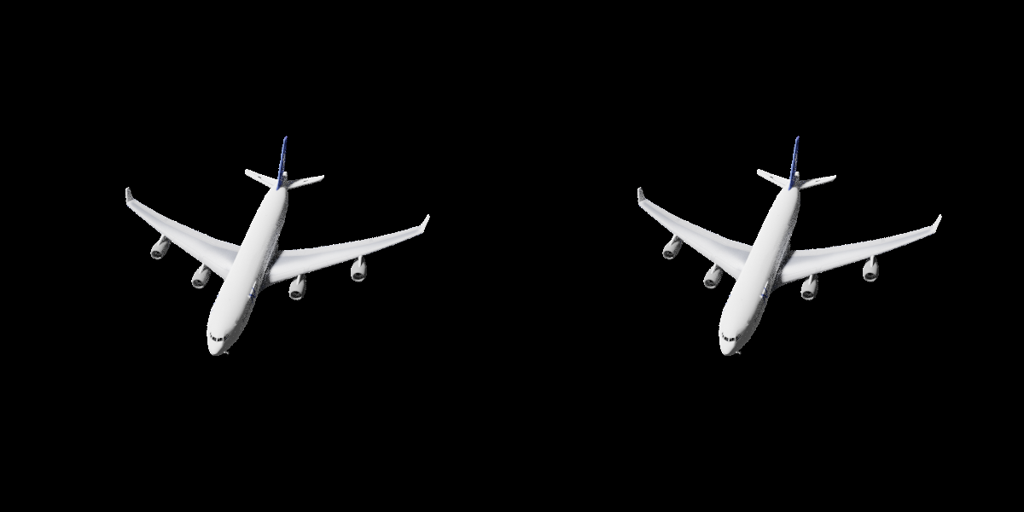

In [28]:
merged_img = merge_images_horizontally(restore_image(data['source']), restore_image(data['target']))
merged_img